# Predict Salary Of a Employe 

## Importing pandas for Data Manipulation

In [648]:
import pandas as pd

## Reading CSV File

In [649]:
df = pd.read_csv("C:/Users/user/Desktop/w/employee_data.csv")

##  Displaying First 5 Rows

In [650]:
df.head()

,Unnamed: 0,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,0,A,36,5,5,2297
1,1,1,A,55,3,5,1134
2,2,2,A,61,8,1,4969
3,3,3,O,29,3,6,902
4,4,4,O,34,6,2,3574


In [651]:
df.shape #1000 rows and 7 features

(1000, 7)

In [652]:
df.drop(["Unnamed: 0","id"],axis = 1,inplace = True)

In [653]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
groups              1000 non-null object
age                 1000 non-null int64
healthy_eating      1000 non-null int64
active_lifestyle    1000 non-null int64
salary              1000 non-null int64
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


## Checking For Null Values

In [654]:
df.isnull().sum()

groups              0
age                 0
healthy_eating      0
active_lifestyle    0
salary              0
dtype: int64

## Importing Visualisation Libraries

In [655]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Understanding The Distribution Of Data

Text(0.5, 1.0, 'Healthy_Eating')

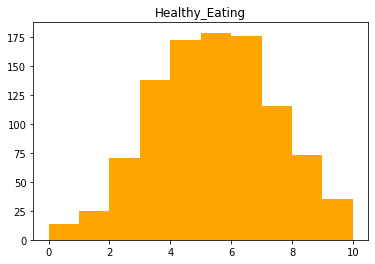

In [656]:
plt.hist(df.healthy_eating,color = "orange")
plt.title("Healthy_Eating")

##  As You Can See Healthy_Eating Feature is Normally distributed (Gaussian Distribution) 

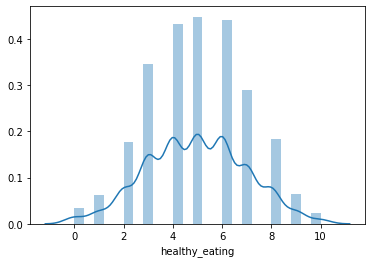

In [657]:
sns.distplot(df["healthy_eating"])

In [658]:
df.healthy_eating.unique().size

11

(array([  7.,  26.,  34.,  92., 104., 168., 213., 163., 114.,  79.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

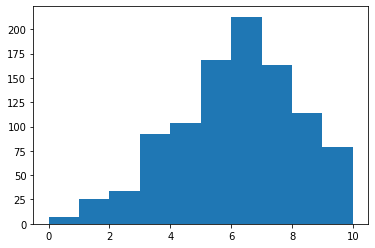

In [659]:
plt.hist(df.active_lifestyle)

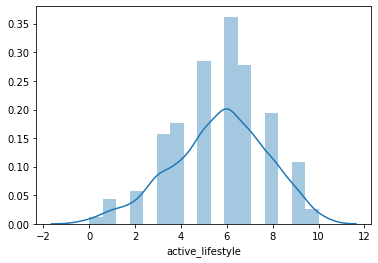

In [660]:
sns.distplot(df["active_lifestyle"])

## As You Can See active_lifestyle Feature is slightly Skewed towards left but it's okay in this dataset

In [661]:
df.groups.value_counts()

A     375
O     375
AB    125
B     125
Name: groups, dtype: int64

In [662]:
df.groupby(["groups"])[["salary"]].mean()

,salary
groups,
A,2176.221333
AB,2261.688000
B,2232.776000
O,2265.520000


## Feature groups As no use in Predicting Salary so its better to drop it

In [663]:
df.drop(["groups"],axis = 1,inplace = True)

In [664]:
df.head()

,age,healthy_eating,active_lifestyle,salary
0,36,5,5,2297
1,55,3,5,1134
2,61,8,1,4969
3,29,3,6,902
4,34,6,2,3574


In [665]:
a = pd.DataFrame(df.groupby(["age"])[["salary"]].mean())
a

,salary
age,
18,2040.560000
19,2497.590909
20,2158.941176
21,2006.300000
22,2453.100000
23,2554.277778
24,2507.312500
25,2402.272727
26,2479.263158


In [666]:
df.salary.max()

5550

In [667]:
df.salary.min()

553

## Exploratory Data Analysis

## It's Clearly shows that Higher the healthy_eating  and Lower the active_lifestyle values results in High Salary  and ViceVersa

In [668]:
df[df["salary"] >= 5000].loc[:,:]

,age,healthy_eating,active_lifestyle,salary
208,23,9,3,5086
212,22,9,2,5318
270,51,10,4,5435
274,33,9,3,5086
607,44,9,1,5550
880,30,10,4,5435
947,26,10,4,5435
974,64,10,5,5204


In [669]:
df[df["salary"] <700].loc[:,:].head(5)

,age,healthy_eating,active_lifestyle,salary
15,57,3,8,662
32,58,3,8,662
38,36,3,7,670
43,42,4,10,556
54,64,3,7,670


Text(0, 0.5, 'Salary')

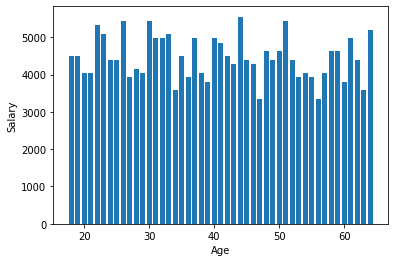

In [670]:
plt.bar(df["age"],df.salary)
plt.xlabel("Age")
plt.ylabel("Salary")

## Feature Age as no use in Predicting Salary so it's better to drop it

In [671]:
df.drop("age",axis = 1,inplace = True)

In [672]:
df.head()

,healthy_eating,active_lifestyle,salary
0,5,5,2297
1,3,5,1134
2,8,1,4969
3,3,6,902
4,6,2,3574


## Understanding The Correlation among Features

In [673]:
print("Salary and healthy_eating are highly correlated")
df.corr()

Salary and healthy_eating are highly correlated


,healthy_eating,active_lifestyle,salary
healthy_eating,1.000000,0.031613,0.858405
active_lifestyle,0.031613,1.000000,-0.323575
salary,0.858405,-0.323575,1.000000


## Sorting DataFrame In ascending order of healthy_eating values

In [674]:
df.sort_values(by = ["healthy_eating"],ascending = True,inplace = True)

In [675]:
df.head(4)

,healthy_eating,active_lifestyle,salary
513,0,4,1478
640,0,5,1710
458,0,4,1478
759,0,7,2174


## resetting the index of after sorting

In [676]:
df.reset_index(drop = True,inplace = True)
df

,healthy_eating,active_lifestyle,salary
0,0,4,1478
1,0,5,1710
2,0,4,1478
3,0,7,2174
4,0,7,2174
...,...,...,...
995,10,4,5435
996,10,5,5204
997,10,9,4276
998,10,8,4508


In [677]:
print("unique values of healthy_eating   :",df.healthy_eating.unique().size)
print("unique values of active_lifestyle :",df.active_lifestyle.unique().size)

unique values of healthy_eating   : 11
unique values of active_lifestyle : 11


## converting ordinal values of  features 1.healthy_eating and  2.active_lifestyle into encoding form using get_dummies function

In [678]:
df = pd.get_dummies(df,columns = ["healthy_eating","active_lifestyle"],drop_first = True,prefix = ["mod_h","mod_a"])

In [679]:
df.head()

,salary,mod_h_1,mod_h_2,mod_h_3,mod_h_4,mod_h_5,mod_h_6,mod_h_7,mod_h_8,mod_h_9,...,mod_a_1,mod_a_2,mod_a_3,mod_a_4,mod_a_5,mod_a_6,mod_a_7,mod_a_8,mod_a_9,mod_a_10
0,1478,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1710,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1478,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2174,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2174,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Model Building

In [680]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [681]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [682]:
x.head()

,mod_h_1,mod_h_2,mod_h_3,mod_h_4,mod_h_5,mod_h_6,mod_h_7,mod_h_8,mod_h_9,mod_h_10,mod_a_1,mod_a_2,mod_a_3,mod_a_4,mod_a_5,mod_a_6,mod_a_7,mod_a_8,mod_a_9,mod_a_10
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Splitting Data into Train and Test Datasets

In [683]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state = 47) #30% testing_data
model = LinearRegression()

## Training Model

In [684]:
model.fit(xtrain,ytrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Validating_test_datasets

In [685]:
pred = model.predict(xtest)

In [686]:
res = pd.DataFrame(ytest)
res["Predicted_value"] = pred
res.rename(columns = {"salary":"Actual_value"},inplace = True)
res.reset_index(drop = True,inplace = True)

In [687]:
print("Actual_value v/s Predicted_value")
res

Actual_value v/s Predicted_value


,Actual_value,Predicted_value
0,1369,1621.083491
1,3345,3439.312174
2,2297,2216.903121
3,1824,963.829533
4,1252,1291.530287
...,...,...
295,3923,3827.601490
296,2297,2216.903121
297,2414,2450.717353
298,3574,3343.024945


In [688]:
from sklearn.metrics import r2_score

## 96% which is pretty good and easy model

In [689]:
print(r2_score(pred,ytest))

0.960609713316363
